In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pfbmod import forward_pfb as pfb
from scipy.interpolate import CubicSpline
from cycler import cycler
import palettable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.interpolate import CubicSpline as cs

In [2]:
def get_delay(t):
    #returns delay in units of sample. delay rate m samples per sample
    c = 0
    m = 1e-3
    return m*t + c
    

In [3]:
N=4096
bigN=4096*100
np.random.seed(42)
n=np.arange(0,bigN)
delay=get_delay(n)
delay2=3100
d=200000
dk = 0.1
print(bigN)
kvals = [1839.1]

y=np.zeros(len(n))
y2=np.zeros(len(n))
y3=np.zeros(len(n))

for kk in kvals:
    y[:] += np.sinc(dk*(n-d)/N)*np.cos(2*np.pi*kk*(n-d)/N)
    y2[:] += np.sinc(dk*(n-delay-d)/N)*np.cos(2*np.pi*kk*(n-delay-d)/N)
    y3[:] += np.sinc(dk*(n-delay2-d)/N)*np.cos(2*np.pi*kk*(n-delay2-d)/N)

409600


In [4]:
delay

array([0.00000e+00, 1.00000e-03, 2.00000e-03, ..., 4.09597e+02,
       4.09598e+02, 4.09599e+02])

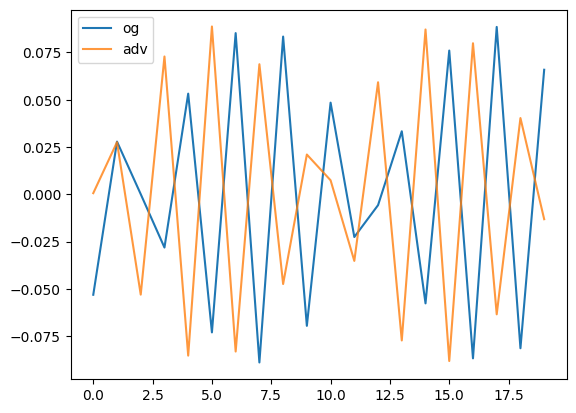

In [5]:
offset=150000
delta=10
center=bigN//2
st=center-offset-delta
en=center-offset+delta
plt.plot(y[st:en],label='og')
plt.plot(y2[st:en],label='adv',alpha=0.8)
# plt.plot(y3_up[st:en],label='fixed',alpha=0.8)
# plt.plot(y3new[st:en],label='recons',alpha=0.8)
plt.legend()
# plt.xlim(bigN//2-100,bigN//2+100)

In [9]:
len(y2_up),len(y)

(4096000, 409600)

In [10]:
y_interp = np.zeros(len(y)-10000,dtype=y.dtype)

In [18]:
# csobj = cs(np.arange(0,len(y3_up)),y3_up)
csobj = cs(np.arange(0,len(y2_up)),y2_up)

In [19]:
new_indices = np.arange(len(y_interp))*osamp / (1-1e-3)

In [20]:
y_interp[:] = csobj(new_indices)

In [21]:
y_interp

array([ 0.00790426, -0.01450246,  0.01961375, ...,  0.01594122,
       -0.00890691,  0.00096853])

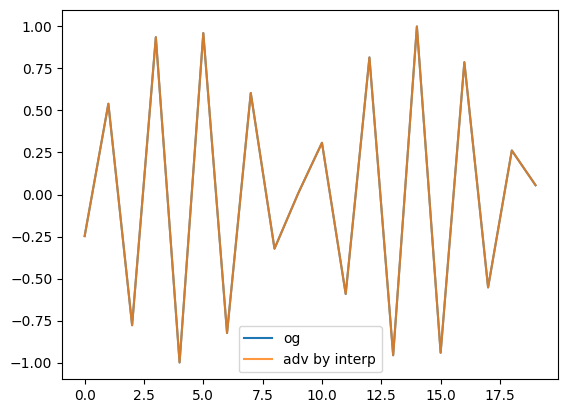

In [23]:
offset=0
delta=10
center=len(y_interp)//2
st=center-offset-delta
en=center-offset+delta
plt.plot(y[st:en],label='og')
plt.plot(y_interp[st:en],label='adv by interp',alpha=0.8)
plt.legend()

In [6]:
yf = np.fft.rfft(y)
y2f = np.fft.rfft(y2)
# y3f = np.fft.rfft(y3)

In [35]:
osamp = 10
y3f_up = np.hstack([y3f,np.zeros((osamp-1)*bigN//2,dtype=y3f.dtype)])
print(y3f_up.shape)

(2048001,)


In [7]:
osamp = 10
y2f_up = np.hstack([y2f,np.zeros((osamp-1)*bigN//2,dtype=y2f.dtype)])
print(y2f_up.shape)

(2048001,)


In [77]:
y3_up = 10*np.fft.irfft(y3f_up)

In [8]:
y2_up = 10*np.fft.irfft(y2f_up)

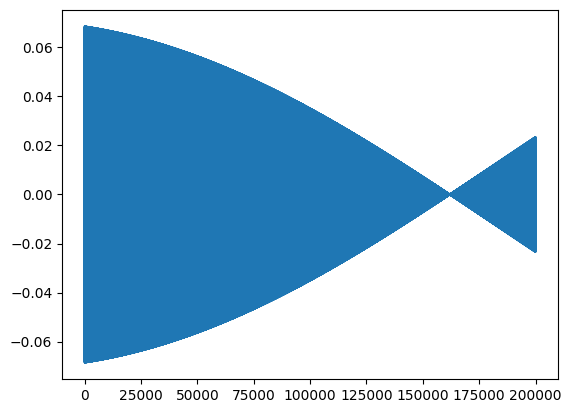

In [14]:
plt.plot(y2_up[200000:200000+200000])

In [16]:
y3fnew = yf * np.exp(-2j*np.pi*np.arange(len(yf))*delay2/len(y)/(1-1e-6))* (1-1e-6)
# y3f = yf * np.exp(-2j*np.pi*np.arange(len(yf))*delay2/len(y))

In [17]:
y3new = np.fft.irfft(y3fnew)

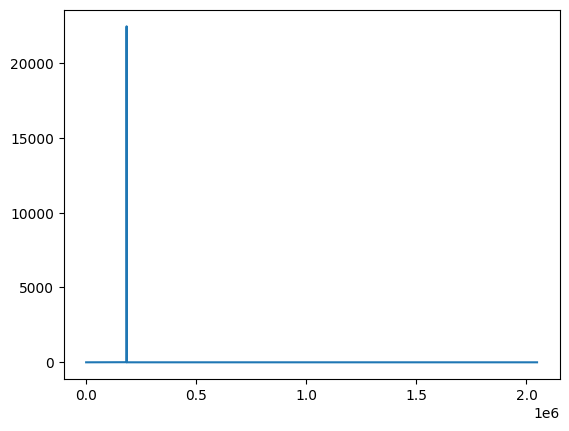

In [12]:
plt.plot(np.abs(y2f_up))
# plt.xlim(18200,18350)

(18200.0, 18350.0)

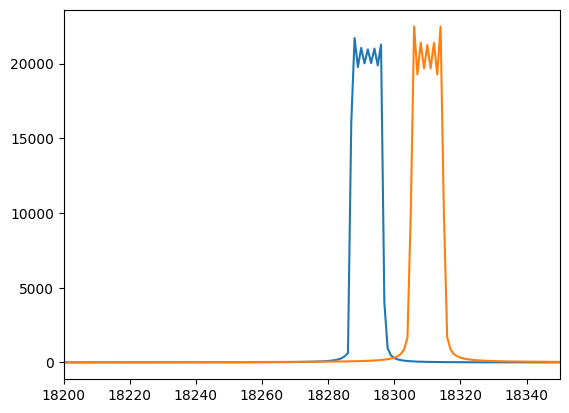

In [28]:
plt.plot(np.abs(y2f))
plt.plot(np.abs(yf))
plt.xlim(18200,18350)

In [29]:
183.1/4096 * len(y)

18310.0

In [32]:
(1-1e-10)*18310

18309.999998169